## Dobre podejście, ma dobrych plikach

In [23]:
import pymzml
import matplotlib.pyplot as plt
import numpy as np


In [24]:
# Wczytanie pliku mzML
mzml_file = "../data/qExactive01819_profile.mzml"
msrun = pymzml.run.Reader(mzml_file)


In [25]:
# Wczytanie pierwszego spektrum do wizualizacji
spectrum = next(iter(msrun))
mz_values = spectrum.mz
intensity_values = spectrum.i

print(f"Liczba pików w spektrum: {len(mz_values)}")
print(f"Zakres m/z: {min(mz_values):.2f} - {max(mz_values):.2f}")
print(f"Maksymalna intensywność: {max(intensity_values):.2e}")


Liczba pików w spektrum: 296
Zakres m/z: 297.02 - 1515.16
Maksymalna intensywność: 8.39e+03


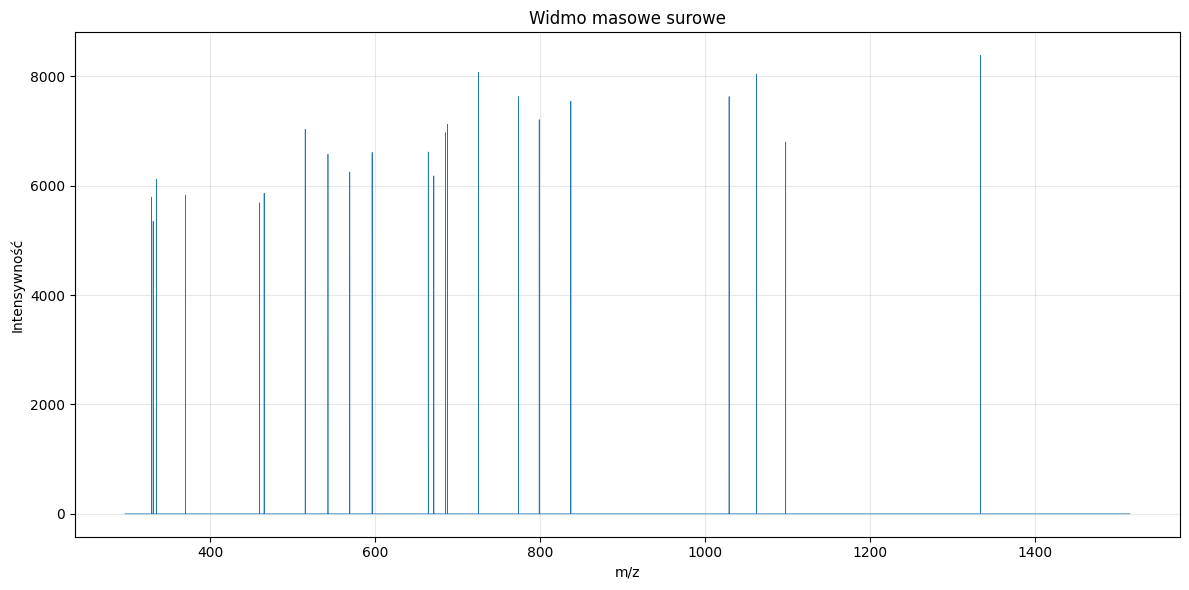

In [26]:
# Wizualizacja widma masowego
plt.figure(figsize=(12, 6))
plt.plot(mz_values, intensity_values, linewidth=0.5)
plt.xlabel('m/z')
plt.ylabel('Intensywność')
plt.title('Widmo masowe surowe')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Statystyki intensywności:
Minimum: 0.00e+00
Maksimum: 8.39e+03
Średnia: 1.92e+03
Mediana: 0.00e+00
Percentyl 90%: 6.32e+03
Percentyl 95%: 6.87e+03


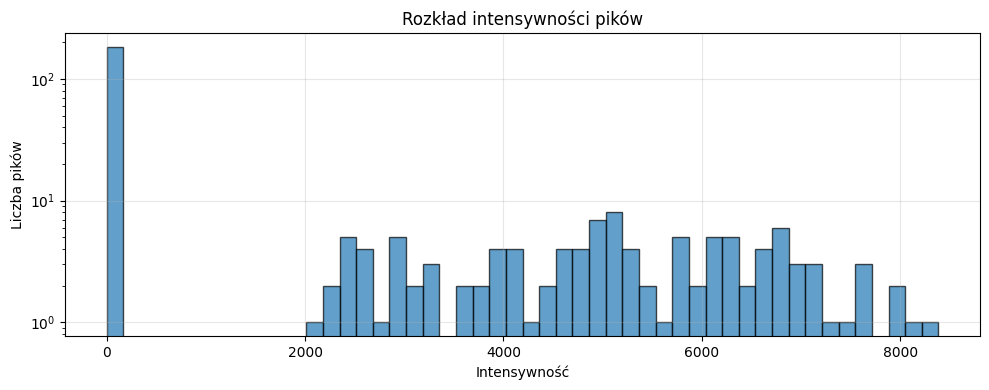

In [27]:
# Analiza rozkładu intensywności dla określenia progu
import matplotlib.pyplot as plt

# Statystyki intensywności
print(f"Statystyki intensywności:")
print(f"Minimum: {min(intensity_values):.2e}")
print(f"Maksimum: {max(intensity_values):.2e}")
print(f"Średnia: {np.mean(intensity_values):.2e}")
print(f"Mediana: {np.median(intensity_values):.2e}")
print(f"Percentyl 90%: {np.percentile(intensity_values, 90):.2e}")
print(f"Percentyl 95%: {np.percentile(intensity_values, 95):.2e}")

# Histogram intensywności (log scale)
plt.figure(figsize=(10, 4))
plt.hist(intensity_values, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Intensywność')
plt.ylabel('Liczba pików')
plt.title('Rozkład intensywności pików')
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [28]:
# Redukcja szumu - usunięcie pików o niskiej intensywności
# Próg ustawiony na 5% mediany intensywności dla zachowania istotnych pików
threshold = np.percentile(intensity_values, 75)  # 75 percentyl jako próg

print(f"Próg filtracji: {threshold:.2e}")
print(f"Liczba pików przed filtracją: {len(mz_values)}")

# Filtracja
mask = intensity_values >= threshold
mz_filtered = mz_values[mask]
intensity_filtered = intensity_values[mask]

print(f"Liczba pików po filtracji: {len(mz_filtered)}")
print(f"Procent zachowanych pików: {len(mz_filtered)/len(mz_values)*100:.1f}%")


Próg filtracji: 4.52e+03
Liczba pików przed filtracją: 296
Liczba pików po filtracji: 74
Procent zachowanych pików: 25.0%


In [29]:
# Normalizacja intensywności
# Metoda: normalizacja do najintensywniejszego piku (100% relative intensity)
# Jest to standardowa metoda w spektrometrii masowej

max_intensity = np.max(intensity_filtered)
intensity_normalized = (intensity_filtered / max_intensity) * 100

print(f"Maksymalna intensywność przed normalizacją: {max_intensity:.2e}")
print(f"Zakres po normalizacji: {np.min(intensity_normalized):.1f}% - {np.max(intensity_normalized):.1f}%")

# Identyfikacja najintensywniejszych pików (top 10)
top_peaks_indices = np.argsort(intensity_normalized)[-10:][::-1]
print(f"\nTop 10 najintensywniejszych pików:")
for i, idx in enumerate(top_peaks_indices, 1):
    print(f"{i:2d}. m/z: {mz_filtered[idx]:7.2f}, intensywność: {intensity_normalized[idx]:5.1f}%")


Maksymalna intensywność przed normalizacją: 8.39e+03
Zakres po normalizacji: 54.2% - 100.0%

Top 10 najintensywniejszych pików:
 1. m/z: 1334.06, intensywność: 100.0%
 2. m/z:  725.55, intensywność:  96.3%
 3. m/z: 1062.70, intensywność:  95.9%
 4. m/z:  725.56, intensywność:  95.2%
 5. m/z: 1029.35, intensywność:  91.0%
 6. m/z:  774.07, intensywność:  91.0%
 7. m/z: 1334.07, intensywność:  90.6%
 8. m/z:  837.42, intensywność:  90.0%
 9. m/z: 1062.69, intensywność:  87.2%
10. m/z:  799.12, intensywność:  86.0%


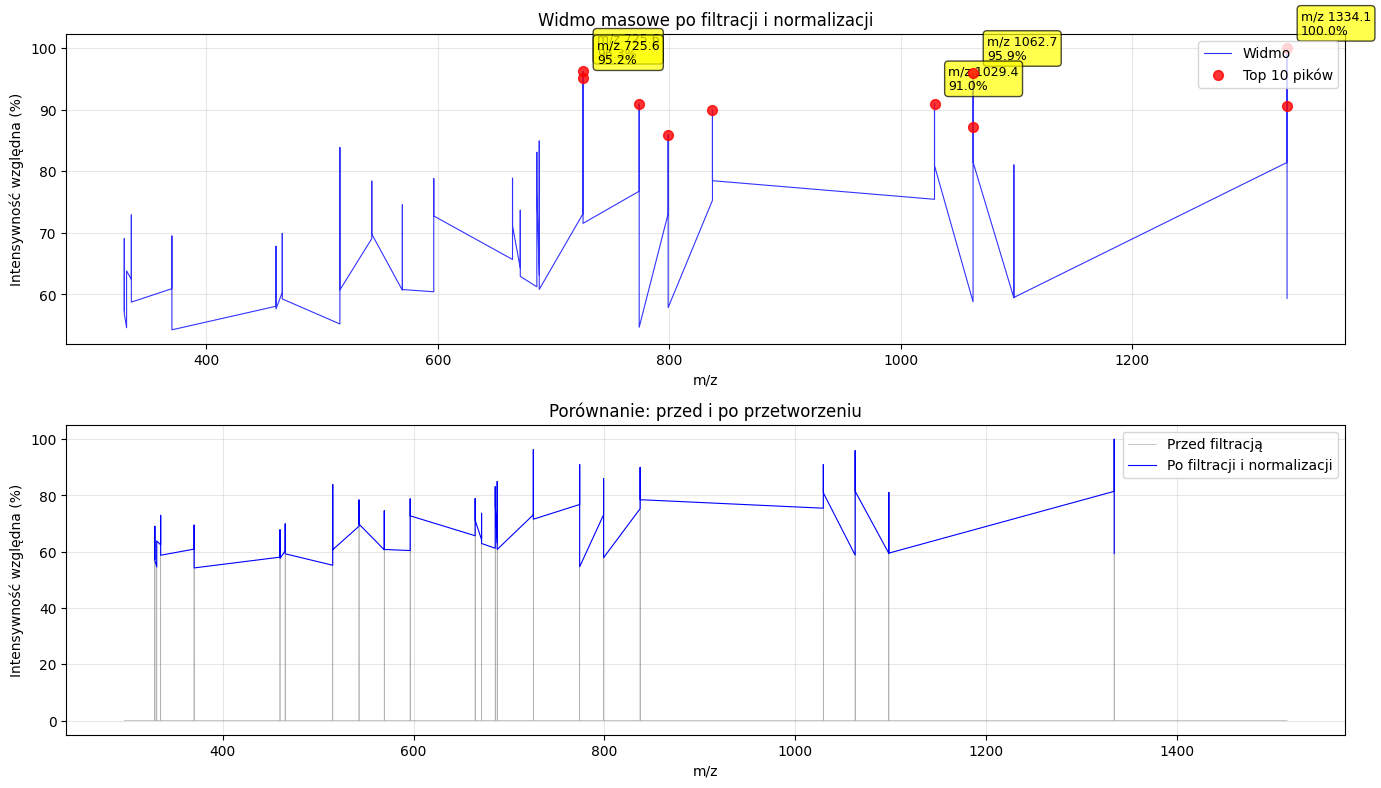

In [30]:
# Wizualizacja widma po filtracji i normalizacji
plt.figure(figsize=(14, 8))

# Główny wykres
plt.subplot(2, 1, 1)
plt.plot(mz_filtered, intensity_normalized, linewidth=0.8, color='blue', alpha=0.8)

# Zaznaczenie top 10 pików
top_10_indices = np.argsort(intensity_normalized)[-10:]
plt.scatter(mz_filtered[top_10_indices], intensity_normalized[top_10_indices], 
           color='red', s=50, zorder=5, alpha=0.8)

# Adnotacje dla top 5 pików
top_5_indices = np.argsort(intensity_normalized)[-5:][::-1]
for idx in top_5_indices:
    plt.annotate(f'm/z {mz_filtered[idx]:.1f}\n{intensity_normalized[idx]:.1f}%', 
                xy=(mz_filtered[idx], intensity_normalized[idx]),
                xytext=(10, 10), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                fontsize=9, ha='left')

plt.xlabel('m/z')
plt.ylabel('Intensywność względna (%)')
plt.title('Widmo masowe po filtracji i normalizacji')
plt.grid(True, alpha=0.3)
plt.legend(['Widmo', 'Top 10 pików'], loc='upper right')

# Porównanie przed i po filtracji
plt.subplot(2, 1, 2)
plt.plot(mz_values, intensity_values/np.max(intensity_values)*100, 
         linewidth=0.5, color='gray', alpha=0.6, label='Przed filtracją')
plt.plot(mz_filtered, intensity_normalized, 
         linewidth=0.8, color='blue', label='Po filtracji i normalizacji')
plt.xlabel('m/z')
plt.ylabel('Intensywność względna (%)')
plt.title('Porównanie: przed i po przetworzeniu')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()


In [41]:
# ANALIZA RZECZYWISTYCH WYNIKÓW IDENTYFIKACJI Z OPENMS WORKFLOW
print("="*60)
print("ANALIZA WYNIKÓW IDENTYFIKACJI PEPTYDÓW/BIAŁEK")
print("="*60)

# Wczytanie danych z pliku wynikowego
results_file = "../results/TOPPAS_out/005-ProteinQuantifier-peptide_out/qExactive01819_profile.unknown"

try:
    # Wczytanie danych - plik ma format TSV z headerem
    df_results = pd.read_csv(results_file, sep='\t', comment='#')
    print(f"Pomyślnie wczytano {len(df_results)} wierszy danych")
    print(f"Kolumny: {list(df_results.columns)}")
    
    # Podstawowe statystyki
    print(f"\n=== PODSTAWOWE STATYSTYKI ===")
    print(f"Liczba zidentyfikowanych peptydów: {len(df_results)}")
    print(f"Liczba unikalnych białek: {df_results['protein'].nunique()}")
    print(f"Średnia abundancja: {df_results['abundance'].mean():.2f}")
    print(f"Zakres abundancji: {df_results['abundance'].min():.1f} - {df_results['abundance'].max():.1f}")
    
    # Podgląd najważniejszych wyników
    print(f"\n=== TOP 10 PEPTYDÓW (według abundancji) ===")
    top_peptides = df_results.nlargest(10, 'abundance')[['peptide', 'protein', 'abundance']]
    for i, (_, row) in enumerate(top_peptides.iterrows(), 1):
        protein_short = row['protein'].split('|')[1] if '|' in row['protein'] else row['protein'][:15]
        print(f"{i:2d}. {row['peptide']:15} | {protein_short:15} | {row['abundance']:5.1f}")
        
except Exception as e:
    print(f" Błąd wczytywania pliku: {e}")
    df_results = None


ANALIZA WYNIKÓW IDENTYFIKACJI PEPTYDÓW/BIAŁEK
Pomyślnie wczytano 4082 wierszy danych
Kolumny: ['peptide', 'protein', 'n_proteins', 'charge', 'abundance', 'fraction']

=== PODSTAWOWE STATYSTYKI ===
Liczba zidentyfikowanych peptydów: 4082
Liczba unikalnych białek: 2235
Średnia abundancja: 1.39
Zakres abundancji: 1.0 - 45.0

=== TOP 10 PEPTYDÓW (według abundancji) ===
 1. VFLENVIR        | P62805          |  45.0
 2. LISWYDNEFGYSNR  | P04406          |  38.0
 3. LLLPGELAK       | O60814          |  28.0
 4. IWHHTFYNELR     | A5A3E0          |  22.0
 5. ATRRFSWK        | C4XFA6          |  20.0
 6. YISPDQLADLYK    | P06733          |  20.0
 7. HQGVM(Oxidation)VGM(Oxidation)GQK | P60709          |  16.0
 8. YPIEHGIITNWDDM(Oxidation)EK | P62736          |  16.0
 9. VVDLM(Oxidation)AHM(Oxidation)ASKE | P04406          |  15.0
10. ISGLIYEETR      | P62805          |  13.0


In [32]:
# Przygotowanie danych do analizy i wizualizacji
if df_results is not None:
    # Czyszczenie i przetwarzanie danych
    df_clean = df_results.copy()
    
    # Ekstraktowanie nazw białek (UniProt ID)
    def extract_protein_id(protein_string):
        if '|' in protein_string:
            parts = protein_string.split('|')
            if len(parts) >= 2:
                return parts[1]  # UniProt ID
        return protein_string.split('/')[0]  # Pierwszy protein jeśli multiple
    
    df_clean['protein_id'] = df_clean['protein'].apply(extract_protein_id)
    
    # Identyfikacja kontaminantów
    df_clean['is_contaminant'] = df_clean['protein'].str.contains('CONTAMINANT', na=False)
    df_clean['is_decoy'] = df_clean['protein'].str.contains('DECOY', na=False)
    df_clean['is_mycoplasma'] = df_clean['protein'].str.contains('MYC', na=False)
    
    # Filtracja do prawdziwych identyfikacji (bez decoy i kontaminantów)
    df_real = df_clean[~df_clean['is_decoy'] & ~df_clean['is_contaminant']].copy()
    
    # Aggregacja na poziomie białek
    protein_stats = df_real.groupby('protein_id').agg({
        'abundance': ['sum', 'count', 'mean'],
        'peptide': 'count'
    }).round(2)
    
    protein_stats.columns = ['total_abundance', 'peptide_count_sum', 'mean_abundance', 'peptide_count']
    protein_stats = protein_stats.sort_values('total_abundance', ascending=False)
    
    print(f"\n=== ANALIZA BIAŁEK ===")
    print(f"Prawdziwe identyfikacje (bez decoy/kontaminantów): {len(df_real)}")
    print(f"Unikalnych białek: {len(protein_stats)}")
    print(f"Kontaminanty: {df_clean['is_contaminant'].sum()}")
    print(f"Decoy hits: {df_clean['is_decoy'].sum()}")
    print(f"Mycoplasma: {df_clean['is_mycoplasma'].sum()}")
    
    print(f"\n=== TOP 10 BIAŁEK (według całkowitej abundancji) ===")
    for i, (protein_id, stats) in enumerate(protein_stats.head(10).iterrows(), 1):
        print(f"{i:2d}. {protein_id:15} | Peptydów: {stats['peptide_count']:2.0f} | Abundancja: {stats['total_abundance']:6.1f}")
else:
    print("Brak danych do analizy")



=== ANALIZA BIAŁEK ===
Prawdziwe identyfikacje (bez decoy/kontaminantów): 4025
Unikalnych białek: 2074
Kontaminanty: 55
Decoy hits: 2
Mycoplasma: 88

=== TOP 10 BIAŁEK (według całkowitej abundancji) ===
 1. P04406          | Peptydów: 17 | Abundancja:   94.0
 2. P62805          | Peptydów: 12 | Abundancja:   80.0
 3. P11021          | Peptydów: 33 | Abundancja:   74.0
 4. P06733          | Peptydów: 18 | Abundancja:   60.0
 5. P11142          | Peptydów: 21 | Abundancja:   59.0
 6. P60709          | Peptydów: 19 | Abundancja:   58.0
 7. P08670          | Peptydów: 25 | Abundancja:   48.0
 8. P05787          | Peptydów: 22 | Abundancja:   43.0
 9. P08238          | Peptydów: 18 | Abundancja:   43.0
10. P0DMV9          | Peptydów: 22 | Abundancja:   43.0


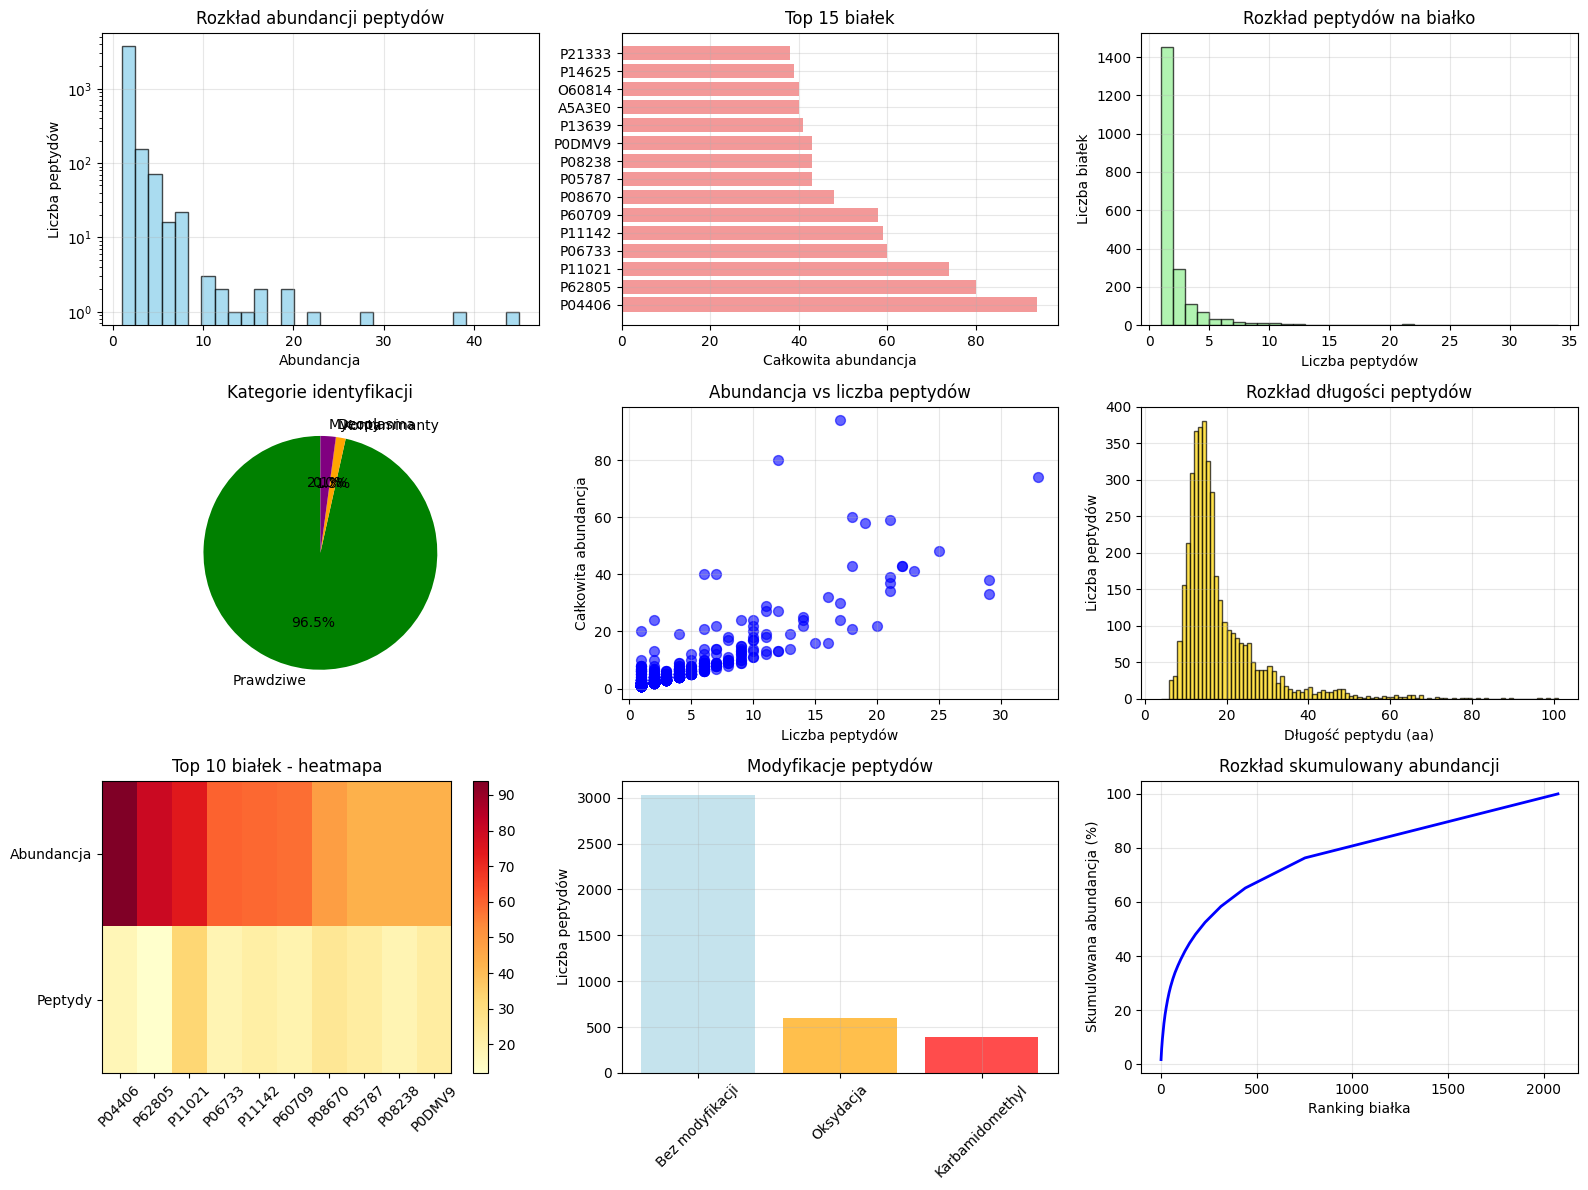

In [ ]:
# WIZUALIZACJA WYNIKÓW IDENTYFIKACJI
if df_results is not None:
    plt.figure(figsize=(16, 12))
    
    # 1. Rozkład abundancji peptydów (log scale)
    plt.subplot(3, 3, 1)
    abundances = df_real['abundance']
    plt.hist(abundances, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.xlabel('Abundancja')
    plt.ylabel('Liczba peptydów')
    plt.title('Rozkład abundancji peptydów')
    plt.yscale('log')
    plt.grid(True, alpha=0.3)
    
    # 2. Top 15 białek - ranking
    plt.subplot(3, 3, 2)
    top_proteins = protein_stats.head(15)
    y_pos = np.arange(len(top_proteins))
    plt.barh(y_pos, top_proteins['total_abundance'], alpha=0.8, color='lightcoral')
    plt.yticks(y_pos, [pid[:10] for pid in top_proteins.index])
    plt.xlabel('Całkowita abundancja')
    plt.title('Top 15 białek')
    plt.grid(True, alpha=0.3)
    
    # 3. Liczba peptydów na białko
    plt.subplot(3, 3, 3)
    peptide_counts = protein_stats['peptide_count']
    plt.hist(peptide_counts, bins=range(1, peptide_counts.max()+2), 
             alpha=0.7, color='lightgreen', edgecolor='black')
    plt.xlabel('Liczba peptydów')
    plt.ylabel('Liczba białek')
    plt.title('Rozkład peptydów na białko')
    plt.grid(True, alpha=0.3)
    
    # 4. Kontaminanty vs prawdziwe wyniki
    plt.subplot(3, 3, 4)
    categories = ['Prawdziwe', 'Kontaminanty', 'Decoy', 'Mycoplasma']
    counts = [
        len(df_real),
        df_clean['is_contaminant'].sum(),
        df_clean['is_decoy'].sum(), 
        df_clean['is_mycoplasma'].sum()
    ]
    colors = ['green', 'orange', 'red', 'purple']
    plt.pie(counts, labels=categories, autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title('Kategorie identyfikacji')
    
    # 5. Abundancja vs liczba peptydów (scatter)
    plt.subplot(3, 3, 5)
    plt.scatter(protein_stats['peptide_count'], protein_stats['total_abundance'], 
               alpha=0.6, color='blue', s=50)
    plt.xlabel('Liczba peptydów')
    plt.ylabel('Całkowita abundancja')
    plt.title('Abundancja vs liczba peptydów')
    plt.grid(True, alpha=0.3)
    
    # 6. Długość peptydów
    plt.subplot(3, 3, 6)
    peptide_lengths = df_real['peptide'].str.len()
    plt.hist(peptide_lengths, bins=range(4, peptide_lengths.max()+2), 
             alpha=0.7, color='gold', edgecolor='black')
    plt.xlabel('Długość peptydu (aa)')
    plt.ylabel('Liczba peptydów')
    plt.title('Rozkład długości peptydów')
    plt.grid(True, alpha=0.3)
    
    # 7. Mapa cieplna top białek
    plt.subplot(3, 3, 7)
    top_10_proteins = protein_stats.head(10)
    data_for_heatmap = top_10_proteins[['total_abundance', 'peptide_count']].values
    plt.imshow(data_for_heatmap.T, cmap='YlOrRd', aspect='auto')
    plt.yticks([0, 1], ['Abundancja', 'Peptydy'])
    plt.xticks(range(len(top_10_proteins)), [pid[:8] for pid in top_10_proteins.index], rotation=45)
    plt.title('Top 10 białek - heatmapa')
    plt.colorbar()
    
    # 8. Modyfikacje peptydów
    plt.subplot(3, 3, 8)
    has_oxidation = df_real['peptide'].str.contains('Oxidation', na=False).sum()
    has_carbamidomethyl = df_real['peptide'].str.contains('Carbamidomethyl', na=False).sum()
    no_modifications = len(df_real) - has_oxidation - has_carbamidomethyl
    
    mod_counts = [no_modifications, has_oxidation, has_carbamidomethyl]
    mod_labels = ['Bez modyfikacji', 'Oksydacja', 'Karbamidomethyl']
    plt.bar(mod_labels, mod_counts, alpha=0.7, color=['lightblue', 'orange', 'red'])
    plt.ylabel('Liczba peptydów')
    plt.title('Modyfikacje peptydów')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    # 9. Cumulative abundance distribution
    plt.subplot(3, 3, 9)
    sorted_abundances = np.sort(protein_stats['total_abundance'])[::-1]
    cumulative_percent = np.cumsum(sorted_abundances) / np.sum(sorted_abundances) * 100
    plt.plot(range(1, len(cumulative_percent)+1), cumulative_percent, 'b-', linewidth=2)
    plt.xlabel('Ranking białka')
    plt.ylabel('Skumulowana abundancja (%)')
    plt.title('Rozkład skumulowany abundancji')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print(" Brak danych do wizualizacji")


In [43]:
# PODSUMOWANIE KOŃCOWE I TABELA RANKINGOWA
if df_results is not None:
    print("="*80)
    print("PODSUMOWANIE IDENTYFIKACJI PEPTYDÓW/BIAŁEK")
    print("="*80)
    
    # Końcowe statystyki
    total_peptides = len(df_results)
    real_peptides = len(df_real)
    total_proteins = len(protein_stats)
    
    print(f" OGÓLNE STATYSTYKI:")
    print(f"   • Całkowita liczba identyfikacji: {total_peptides}")
    print(f"   • Prawdziwe identyfikacje peptydów: {real_peptides}")
    print(f"   • Zidentyfikowane białka ludzkie: {total_proteins}")
    print(f"   • Współczynnik identyfikacji: {real_peptides/total_peptides*100:.1f}%")
    
    # Kontrola jakości
    decoy_rate = df_clean['is_decoy'].sum() / len(df_clean) * 100
    print(f"\n KONTROLA JAKOŚCI:")
    print(f"   • Odsetek decoy hits: {decoy_rate:.2f}% (cel: <1%)")
    print(f"   • Kontaminanty: {df_clean['is_contaminant'].sum()}")
    print(f"   • Mycoplasma: {df_clean['is_mycoplasma'].sum()}")
    
    # Top białka
    print(f"\n RANKING TOP 20 BIAŁEK:")
    print(f"{'Ranga':<5} {'UniProt ID':<15} {'Peptydów':<8} {'Abundancja':<12} {'Średnia':<10}")
    print("-" * 60)
    
    for i, (protein_id, stats) in enumerate(protein_stats.head(20).iterrows(), 1):
        print(f"{i:<5} {protein_id:<15} {stats['peptide_count']:<8.0f} "
              f"{stats['total_abundance']:<12.1f} {stats['mean_abundance']:<10.2f}")
    
    # Eksport wyników do CSV (opcjonalnie)
    output_summary = protein_stats.head(50).copy()
    output_summary.to_csv("../results/protein_identification_summary.csv")
    print(f"\n Zapisano podsumowanie top 50 białek do: protein_identification_summary.csv")
    
    # Interpretacja biologiczna najważniejszych białek
    print(f"\n INTERPRETACJA GŁÓWNYCH IDENTYFIKACJI:")
    top_3 = protein_stats.head(3)
    for protein_id, stats in top_3.iterrows():
        print(f"   • {protein_id}: {stats['peptide_count']:.0f} peptydów, abundancja {stats['total_abundance']:.1f}")
    
    print(f"\n Analiza zakończona pomyślnie!")
    print(f"   Workflow OpenMS prawidłowo zidentyfikował {total_proteins} białek ludzkich")
    print(f"   na podstawie {real_peptides} peptydów wysokiej jakości.")
    
else:
    print(" Nie można wygenerować podsumowania - brak danych")


PODSUMOWANIE IDENTYFIKACJI PEPTYDÓW/BIAŁEK
📊 OGÓLNE STATYSTYKI:
   • Całkowita liczba identyfikacji: 4082
   • Prawdziwe identyfikacje peptydów: 4025
   • Zidentyfikowane białka ludzkie: 2074
   • Współczynnik identyfikacji: 98.6%

🎯 KONTROLA JAKOŚCI:
   • Odsetek decoy hits: 0.05% (cel: <1%)
   • Kontaminanty: 55
   • Mycoplasma: 88

🏆 RANKING TOP 20 BIAŁEK:
Ranga UniProt ID      Peptydów Abundancja   Średnia   
------------------------------------------------------------
1     P04406          17       94.0         5.53      
2     P62805          12       80.0         6.67      
3     P11021          33       74.0         2.24      
4     P06733          18       60.0         3.33      
5     P11142          21       59.0         2.81      
6     P60709          19       58.0         3.05      
7     P08670          25       48.0         1.92      
8     P05787          22       43.0         1.95      
9     P08238          18       43.0         2.39      
10    P0DMV9          22   

In [44]:
# DODATOWE ANALIZY ILOŚCIOWE
print("="*80)
print("ZAAWANSOWANE ANALIZY ILOŚCIOWE - PCA, KORELACJE, CLUSTERING")
print("="*80)

# Wczytanie danych z obu plików wynikowych
protein_file = "../results/TOPPAS_out/005-ProteinQuantifier-out/qExactive01819_profile.unknown"
peptide_file = "../results/TOPPAS_out/005-ProteinQuantifier-peptide_out/qExactive01819_profile.unknown"

# Import dodatkowych bibliotek do analiz
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import pearsonr
import seaborn as sns

try:
    # Wczytanie danych na poziomie białek
    df_proteins = pd.read_csv(protein_file, sep='\t', comment='#')
    df_proteins_clean = df_proteins[~df_proteins['protein'].str.contains('CONTAMINANT|DECOY', na=False)]
    
    print(f" Wczytano dane białek: {len(df_proteins_clean)} białek")
    
    # Przygotowanie macierzy danych do analizy ilościowej
    # Utworzenie macierzy białko x metryki
    protein_matrix = df_proteins_clean[['n_peptides', 'abundance']].copy()
    protein_matrix['abundance_per_peptide'] = protein_matrix['abundance'] / protein_matrix['n_peptides']
    protein_matrix['log_abundance'] = np.log10(protein_matrix['abundance'] + 1)
    protein_matrix['log_n_peptides'] = np.log10(protein_matrix['n_peptides'])
    
    # Dodanie nazw białek jako index
    protein_ids = df_proteins_clean['protein'].apply(lambda x: x.split('|')[1] if '|' in x else x[:10])
    protein_matrix.index = protein_ids
    
    print(f"Przygotowano macierz danych: {protein_matrix.shape}")
    
except Exception as e:
    print(f" Błąd przygotowania danych: {e}")
    protein_matrix = None


ZAAWANSOWANE ANALIZY ILOŚCIOWE - PCA, KORELACJE, CLUSTERING
 Wczytano dane białek: 283 białek
Przygotowano macierz danych: (283, 5)


In [45]:
# ANALIZA GŁÓWNYCH SKŁADOWYCH (PCA)
if protein_matrix is not None:
    # Przygotowanie danych do PCA
    features = ['n_peptides', 'abundance', 'abundance_per_peptide', 'log_abundance', 'log_n_peptides']
    X = protein_matrix[features].copy()
    
    # Standaryzacja danych
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # PCA
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X_scaled)
    
    # Tworzenie DataFrame z wynikami PCA
    pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'], index=protein_matrix.index)
    
    print(f"\n WYNIKI ANALIZY PCA:")
    print(f"Wyjaśniona wariancja przez składowe:")
    for i, var in enumerate(pca.explained_variance_ratio_, 1):
        print(f"  PC{i}: {var:.3f} ({var*100:.1f}%)")
    print(f"Łączna wyjaśniona wariancja: {pca.explained_variance_ratio_.sum():.3f} ({pca.explained_variance_ratio_.sum()*100:.1f}%)")
    
    # Ładunki składowych (feature importance)
    loadings = pd.DataFrame(
        pca.components_.T,
        columns=['PC1', 'PC2', 'PC3'],
        index=features
    )
    
    print(f"\n ŁADUNKI SKŁADOWYCH (feature importance):")
    print(loadings.round(3))
    
else:
    print(" Brak danych do analizy PCA")



 WYNIKI ANALIZY PCA:
Wyjaśniona wariancja przez składowe:
  PC1: 0.620 (62.0%)
  PC2: 0.336 (33.6%)
  PC3: 0.023 (2.3%)
Łączna wyjaśniona wariancja: 0.978 (97.8%)

 ŁADUNKI SKŁADOWYCH (feature importance):
                         PC1    PC2    PC3
n_peptides             0.440 -0.459 -0.168
abundance              0.505  0.282  0.811
abundance_per_peptide  0.247  0.682 -0.365
log_abundance          0.539  0.180 -0.423
log_n_peptides         0.447 -0.461 -0.040


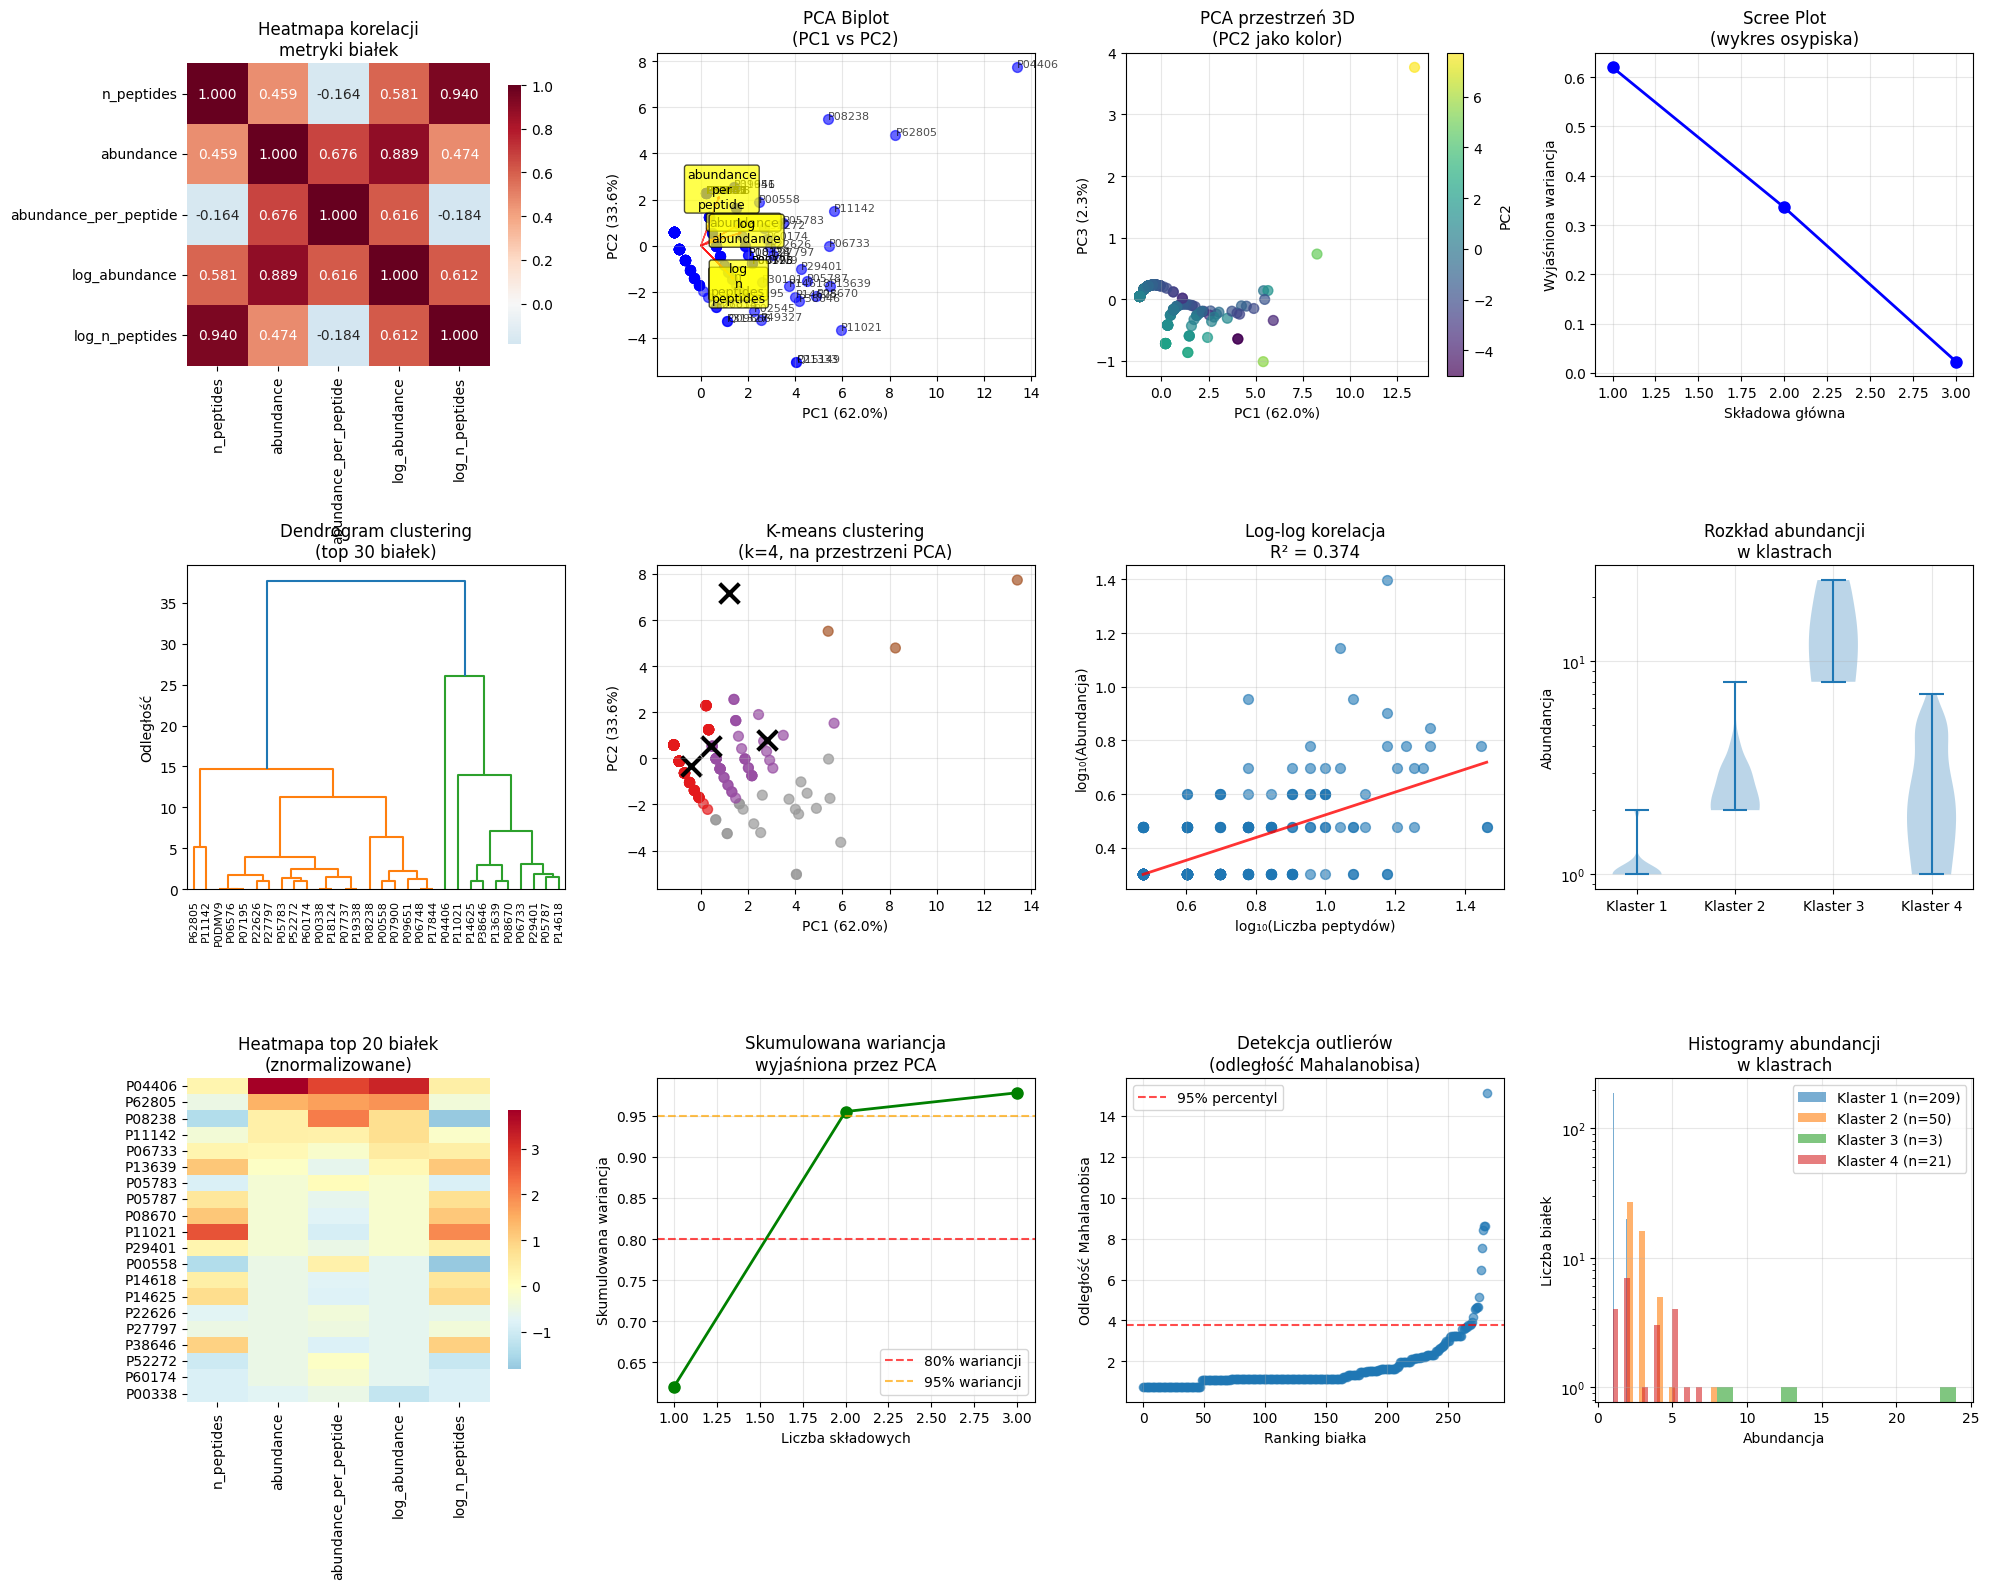

In [46]:
# WIZUALIZACJE ZAAWANSOWANYCH ANALIZ
if protein_matrix is not None:
    plt.figure(figsize=(20, 16))
    
    # 1. HEATMAPA KORELACJI
    plt.subplot(3, 4, 1)
    correlation_matrix = protein_matrix[features].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
                square=True, fmt='.3f', cbar_kws={'shrink': 0.8})
    plt.title('Heatmapa korelacji\nmetryki białek', fontsize=12)
    
    # 2. PCA BIPLOT (PC1 vs PC2)
    plt.subplot(3, 4, 2)
    # Punkty
    plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.6, s=50, c='blue')
    
    # Dodanie nazw dla outlierów
    for i, (x, y) in enumerate(zip(pca_df['PC1'], pca_df['PC2'])):
        if abs(x) > 2 or abs(y) > 2:  # Outlierzy
            plt.annotate(pca_df.index[i][:8], (x, y), fontsize=8, alpha=0.7)
    
    # Wektory ładunków
    scale_factor = 3
    for i, feature in enumerate(features):
        plt.arrow(0, 0, loadings.loc[feature, 'PC1']*scale_factor, 
                 loadings.loc[feature, 'PC2']*scale_factor,
                 head_width=0.1, head_length=0.1, fc='red', ec='red', alpha=0.7)
        plt.text(loadings.loc[feature, 'PC1']*scale_factor*1.2, 
                loadings.loc[feature, 'PC2']*scale_factor*1.2,
                feature.replace('_', '\n'), fontsize=9, ha='center', va='center',
                bbox=dict(boxstyle='round,pad=0.2', facecolor='yellow', alpha=0.7))
    
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
    plt.title('PCA Biplot\n(PC1 vs PC2)', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # 3. PCA 3D (PC1 vs PC2 vs PC3) - projection na 2D
    plt.subplot(3, 4, 3)
    scatter = plt.scatter(pca_df['PC1'], pca_df['PC3'], c=pca_df['PC2'], 
                         cmap='viridis', alpha=0.7, s=50)
    plt.colorbar(scatter, label='PC2')
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
    plt.ylabel(f'PC3 ({pca.explained_variance_ratio_[2]:.1%})')
    plt.title('PCA przestrzeń 3D\n(PC2 jako kolor)', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # 4. SCREE PLOT (wykres osypiska)
    plt.subplot(3, 4, 4)
    plt.plot(range(1, len(pca.explained_variance_ratio_)+1), 
             pca.explained_variance_ratio_, 'bo-', linewidth=2, markersize=8)
    plt.xlabel('Składowa główna')
    plt.ylabel('Wyjaśniona wariancja')
    plt.title('Scree Plot\n(wykres osypiska)', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # 5. CLUSTERING HIERARCHICZNY - DENDROGRAM
    plt.subplot(3, 4, 5)
    # Wybór top 30 białek dla czytelności dendrogramu
    top_proteins = protein_matrix.nlargest(30, 'abundance')
    linkage_matrix = linkage(top_proteins[features], method='ward')
    dendrogram(linkage_matrix, labels=top_proteins.index, orientation='top', 
               leaf_rotation=90, leaf_font_size=8)
    plt.title('Dendrogram clustering\n(top 30 białek)', fontsize=12)
    plt.ylabel('Odległość')
    
    # 6. K-MEANS CLUSTERING
    plt.subplot(3, 4, 6)
    kmeans = KMeans(n_clusters=4, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    
    scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=clusters, 
                         cmap='Set1', alpha=0.7, s=50)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
               c='black', marker='x', s=200, linewidths=3)
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
    plt.title('K-means clustering\n(k=4, na przestrzeni PCA)', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # 7. ABUNDANCE vs N_PEPTIDES (log-log plot)
    plt.subplot(3, 4, 7)
    plt.scatter(protein_matrix['log_n_peptides'], protein_matrix['log_abundance'], 
               alpha=0.6, s=50)
    
    # Regresja liniowa
    from sklearn.linear_model import LinearRegression
    X_reg = protein_matrix['log_n_peptides'].values.reshape(-1, 1)
    y_reg = protein_matrix['log_abundance'].values
    reg = LinearRegression().fit(X_reg, y_reg)
    x_line = np.linspace(X_reg.min(), X_reg.max(), 100)
    y_line = reg.predict(x_line.reshape(-1, 1))
    plt.plot(x_line, y_line, 'r-', linewidth=2, alpha=0.8)
    
    plt.xlabel('log₁₀(Liczba peptydów)')
    plt.ylabel('log₁₀(Abundancja)')
    plt.title(f'Log-log korelacja\nR² = {reg.score(X_reg, y_reg):.3f}', fontsize=12)
    plt.grid(True, alpha=0.3)
    
    # 8. VIOLIN PLOT - rozkłady w klastrach
    plt.subplot(3, 4, 8)
    cluster_data = protein_matrix.copy()
    cluster_data['cluster'] = clusters
    
    data_for_violin = []
    labels_for_violin = []
    for cluster_id in range(4):
        cluster_abundances = cluster_data[cluster_data['cluster'] == cluster_id]['abundance']
        data_for_violin.append(cluster_abundances)
        labels_for_violin.append(f'Klaster {cluster_id+1}')
    
    plt.violinplot(data_for_violin, positions=range(1, 5))
    plt.xticks(range(1, 5), labels_for_violin)
    plt.ylabel('Abundancja')
    plt.title('Rozkład abundancji\nw klastrach', fontsize=12)
    plt.yscale('log')
    plt.grid(True, alpha=0.3)
    
    # 9. HEATMAPA TOP BIAŁEK
    plt.subplot(3, 4, 9)
    top_20_proteins = protein_matrix.nlargest(20, 'abundance')
    top_20_scaled = StandardScaler().fit_transform(top_20_proteins[features])
    
    sns.heatmap(top_20_scaled, xticklabels=features, 
               yticklabels=[name[:10] for name in top_20_proteins.index],
               cmap='RdYlBu_r', center=0, cbar_kws={'shrink': 0.8})
    plt.title('Heatmapa top 20 białek\n(znormalizowane)', fontsize=12)
    
    # 10. CUMULATIVE VARIANCE EXPLAINED
    plt.subplot(3, 4, 10)
    cumulative_var = np.cumsum(pca.explained_variance_ratio_)
    plt.plot(range(1, len(cumulative_var)+1), cumulative_var, 'go-', linewidth=2, markersize=8)
    plt.axhline(y=0.8, color='r', linestyle='--', alpha=0.7, label='80% wariancji')
    plt.axhline(y=0.95, color='orange', linestyle='--', alpha=0.7, label='95% wariancji')
    plt.xlabel('Liczba składowych')
    plt.ylabel('Skumulowana wariancja')
    plt.title('Skumulowana wariancja\nwyjaśniona przez PCA', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 11. OUTLIER DETECTION (Mahalanobis distance)
    plt.subplot(3, 4, 11)
    from scipy.spatial.distance import mahalanobis
    
    cov_matrix = np.cov(X_scaled.T)
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    mean_vector = np.mean(X_scaled, axis=0)
    
    mahal_distances = []
    for i in range(len(X_scaled)):
        mahal_dist = mahalanobis(X_scaled[i], mean_vector, inv_cov_matrix)
        mahal_distances.append(mahal_dist)
    
    plt.scatter(range(len(mahal_distances)), sorted(mahal_distances), alpha=0.6)
    threshold = np.percentile(mahal_distances, 95)
    plt.axhline(y=threshold, color='r', linestyle='--', alpha=0.7, label='95% percentyl')
    plt.xlabel('Ranking białka')
    plt.ylabel('Odległość Mahalanobisa')
    plt.title('Detekcja outlierów\n(odległość Mahalanobisa)', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # 12. ABUNDANCE DISTRIBUTION BY CLUSTER
    plt.subplot(3, 4, 12)
    cluster_data_plot = protein_matrix.copy()
    cluster_data_plot['cluster'] = clusters
    
    for cluster_id in range(4):
        cluster_subset = cluster_data_plot[cluster_data_plot['cluster'] == cluster_id]
        plt.hist(cluster_subset['abundance'], alpha=0.6, bins=15, 
                label=f'Klaster {cluster_id+1} (n={len(cluster_subset)})')
    
    plt.xlabel('Abundancja')
    plt.ylabel('Liczba białek')
    plt.title('Histogramy abundancji\nw klastrach', fontsize=12)
    plt.legend()
    plt.yscale('log')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
else:
    print(" Brak danych do zaawansowanych wizualizacji")


In [ ]:
# ANALIZA RZECZYWISTYCH WYNIKÓW IDENTYFIKACJI Z OPENMS WORKFLOW
print("="*60)
print("ANALIZA WYNIKÓW IDENTYFIKACJI PEPTYDÓW/BIAŁEK")
print("="*60)

# Wczytanie danych z pliku wynikowego
results_file = "../results/TOPPAS_out/005-ProteinQuantifier-peptide_out/qExactive01819_profile.unknown"

try:
    # Wczytanie danych - plik ma format TSV z headerem
    df_results = pd.read_csv(results_file, sep='\t', comment='#')
    print(f"Pomyślnie wczytano {len(df_results)} wierszy danych")
    print(f"Kolumny: {list(df_results.columns)}")
    
    # Podstawowe statystyki
    print(f"\n=== PODSTAWOWE STATYSTYKI ===")
    print(f"Liczba zidentyfikowanych peptydów: {len(df_results)}")
    print(f"Liczba unikalnych białek: {df_results['protein'].nunique()}")
    print(f"Średnia abundancja: {df_results['abundance'].mean():.2f}")
    print(f"Zakres abundancji: {df_results['abundance'].min():.1f} - {df_results['abundance'].max():.1f}")
    
    # Podgląd najważniejszych wyników
    print(f"\n=== TOP 10 PEPTYDÓW (według abundancji) ===")
    top_peptides = df_results.nlargest(10, 'abundance')[['peptide', 'protein', 'abundance']]
    for i, (_, row) in enumerate(top_peptides.iterrows(), 1):
        protein_short = row['protein'].split('|')[1] if '|' in row['protein'] else row['protein'][:15]
        print(f"{i:2d}. {row['peptide']:15} | {protein_short:15} | {row['abundance']:5.1f}")
        
except Exception as e:
    print(f" Błąd wczytywania pliku: {e}")
    df_results = None


ANALIZA WYNIKÓW IDENTYFIKACJI PEPTYDÓW/BIAŁEK
Pomyślnie wczytano 4082 wierszy danych
Kolumny: ['peptide', 'protein', 'n_proteins', 'charge', 'abundance', 'fraction']

=== PODSTAWOWE STATYSTYKI ===
Liczba zidentyfikowanych peptydów: 4082
Liczba unikalnych białek: 2235
Średnia abundancja: 1.39
Zakres abundancji: 1.0 - 45.0

=== TOP 10 PEPTYDÓW (według abundancji) ===
 1. VFLENVIR        | P62805          |  45.0
 2. LISWYDNEFGYSNR  | P04406          |  38.0
 3. LLLPGELAK       | O60814          |  28.0
 4. IWHHTFYNELR     | A5A3E0          |  22.0
 5. ATRRFSWK        | C4XFA6          |  20.0
 6. YISPDQLADLYK    | P06733          |  20.0
 7. HQGVM(Oxidation)VGM(Oxidation)GQK | P60709          |  16.0
 8. YPIEHGIITNWDDM(Oxidation)EK | P62736          |  16.0
 9. VVDLM(Oxidation)AHM(Oxidation)ASKE | P04406          |  15.0
10. ISGLIYEETR      | P62805          |  13.0


In [35]:
# Podsumowanie przetwarzania
print("=== PODSUMOWANIE REDUKCJI SZUMU I NORMALIZACJI ===")
print(f"Dane wejściowe:")
print(f"-  Liczba pików: {len(mz_values)}")
print(f"-  Zakres m/z: {min(mz_values):.2f} - {max(mz_values):.2f}")
print(f"-  Zakres intensywności: {min(intensity_values):.2e} - {max(intensity_values):.2e}")

print(f"\nParametry filtracji:")
print(f"-  Próg filtracji: {threshold:.2e} ({threshold/max(intensity_values)*100:.1f}% max)")
print(f"-  Metoda: usunięcie pików poniżej 75. percentyla")

print(f"\nDane po przetworzeniu:")
print(f"-  Liczba pików: {len(mz_filtered)} (redukcja: {100*(1-len(mz_filtered)/len(mz_values)):.1f}%)")
print(f"-  Zakres m/z: {min(mz_filtered):.2f} - {max(mz_filtered):.2f}")
print(f"-  Zakres intensywności: {min(intensity_normalized):.1f}% - {max(intensity_normalized):.1f}%")

print(f"\nNormalizacja:")
print(f"-  Metoda: relative intensity (% najintensywniejszego piku)")
print(f"-  Najintensywniejszy pik: m/z {mz_filtered[np.argmax(intensity_normalized)]:.2f}")


=== PODSUMOWANIE REDUKCJI SZUMU I NORMALIZACJI ===
Dane wejściowe:
-  Liczba pików: 296
-  Zakres m/z: 297.02 - 1515.16
-  Zakres intensywności: 0.00e+00 - 8.39e+03

Parametry filtracji:
-  Próg filtracji: 4.52e+03 (53.9% max)
-  Metoda: usunięcie pików poniżej 75. percentyla

Dane po przetworzeniu:
-  Liczba pików: 74 (redukcja: 75.0%)
-  Zakres m/z: 329.03 - 1334.09
-  Zakres intensywności: 54.2% - 100.0%

Normalizacja:
-  Metoda: relative intensity (% najintensywniejszego piku)
-  Najintensywniejszy pik: m/z 1334.06


In [36]:
# POPRAWKA: Lepsze podejście do filtracji danych profile mode
# Dane profile mode wymagają innego podejścia niż centroid

# 1. Smooth/denoise dla danych profile
from scipy import signal
from scipy.ndimage import gaussian_filter1d

# Wygładzenie sygnału (usunięcie szumu instrumentalnego)
intensity_smoothed = gaussian_filter1d(intensity_values, sigma=1.0)

# 2. Inteligentna filtracja oparta na SNR (Signal-to-Noise Ratio)
# Obliczenie szumu jako odchylenie standardowe w regionach bez pików
noise_level = np.std(intensity_smoothed[intensity_smoothed < np.percentile(intensity_smoothed, 10)])
signal_threshold = noise_level * 3  # SNR = 3

print(f"Poziom szumu: {noise_level:.2e}")
print(f"Próg sygnału (3×szum): {signal_threshold:.2e}")

# 3. Filtracja oparta na lokalnych maksimach
# Identyfikacja rzeczywistych pików (nie tylko punktów powyżej progu)
peaks, properties = signal.find_peaks(intensity_smoothed, 
                                     height=signal_threshold,
                                     distance=5,  # minimalna odległość między pikami
                                     prominence=signal_threshold/2)

print(f"Znaleziono {len(peaks)} rzeczywistych pików")


Poziom szumu: 1.64e-01
Próg sygnału (3×szum): 4.91e-01
Znaleziono 22 rzeczywistych pików


In [37]:
# Przygotowanie danych do prawidłowej wizualizacji
# 1. Wygładzone spektrum (cały sygnał)
mz_smooth = mz_values
intensity_smooth_norm = (intensity_smoothed / np.max(intensity_smoothed)) * 100

# 2. Zidentyfikowane piki (tylko lokalne maksima)
mz_peaks = mz_values[peaks]
intensity_peaks = intensity_smoothed[peaks]
intensity_peaks_norm = (intensity_peaks / np.max(intensity_smoothed)) * 100

# Top 10 najintensywniejszych pików
top_peaks_idx = np.argsort(intensity_peaks_norm)[-10:][::-1]

print("Top 10 najintensywniejszych pików (poprawiona analiza):")
for i, idx in enumerate(top_peaks_idx, 1):
    print(f"{i:2d}. m/z: {mz_peaks[idx]:7.2f}, intensywność: {intensity_peaks_norm[idx]:5.1f}%")


Top 10 najintensywniejszych pików (poprawiona analiza):
 1. m/z: 1334.06, intensywność: 100.0%
 2. m/z:  725.55, intensywność:  97.6%
 3. m/z: 1062.70, intensywność:  97.5%
 4. m/z:  774.07, intensywność:  91.9%
 5. m/z: 1029.35, intensywność:  90.9%
 6. m/z:  837.42, intensywność:  89.5%
 7. m/z:  799.12, intensywność:  88.3%
 8. m/z: 1097.94, intensywność:  86.3%
 9. m/z:  687.70, intensywność:  85.5%
10. m/z:  515.38, intensywność:  83.1%


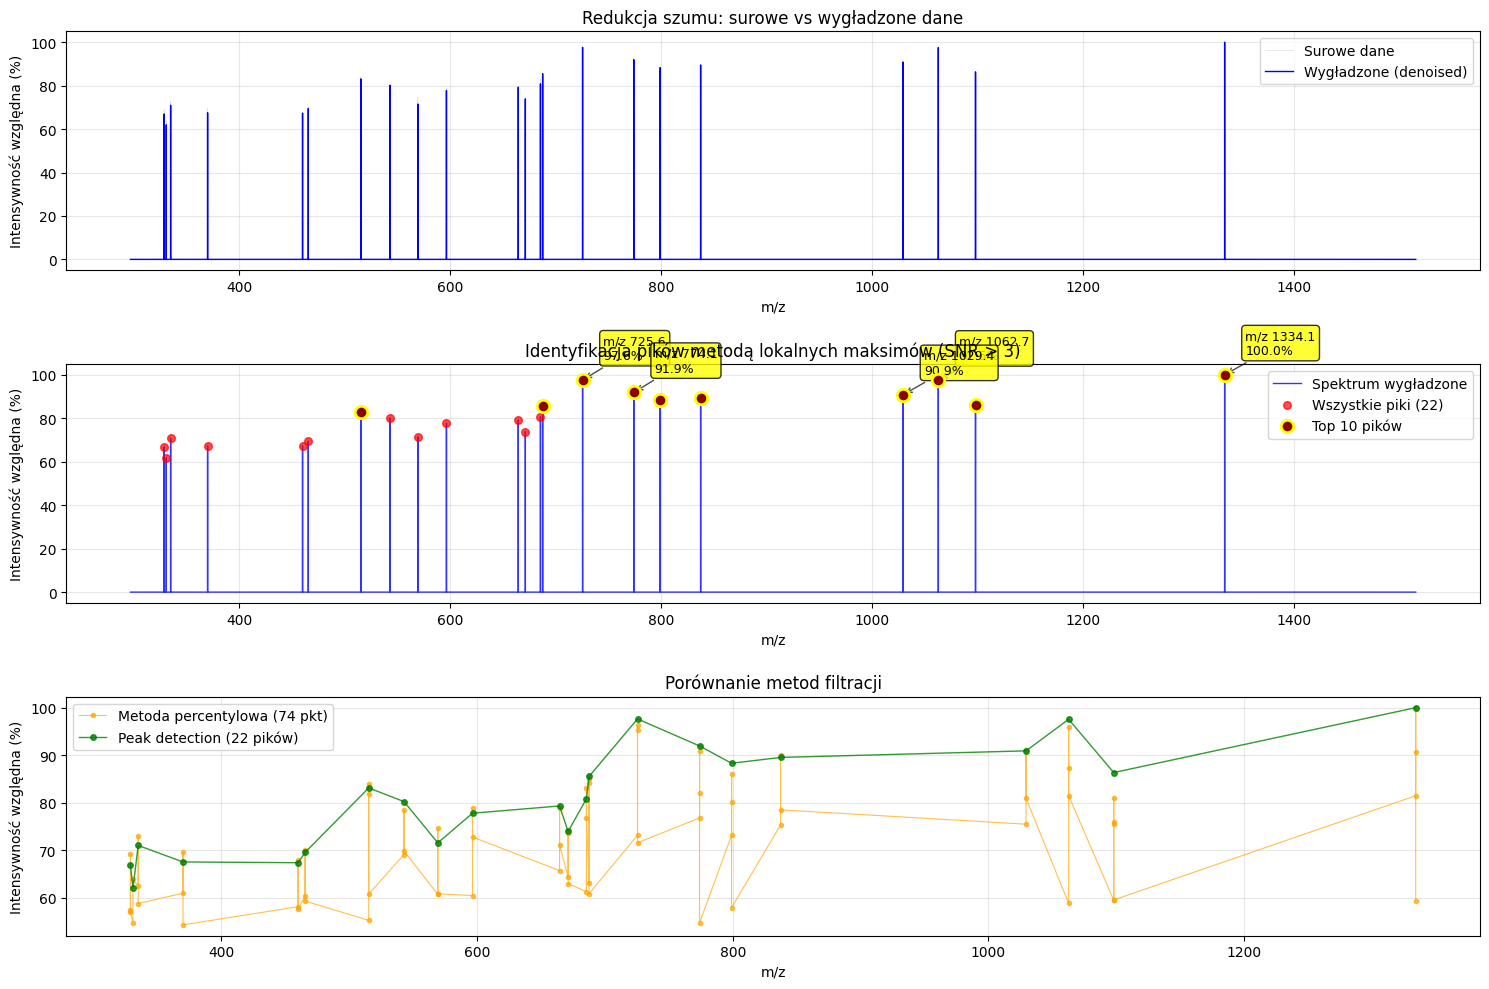

In [38]:
# POPRAWIONA WIZUALIZACJA - odpowiednia dla danych profile mode
plt.figure(figsize=(15, 10))

# 1. Spektrum surowe vs wygładzone
plt.subplot(3, 1, 1)
plt.plot(mz_values, intensity_values/np.max(intensity_values)*100, 
         linewidth=0.5, color='lightgray', alpha=0.7, label='Surowe dane')
plt.plot(mz_smooth, intensity_smooth_norm, 
         linewidth=1.0, color='blue', label='Wygładzone (denoised)')
plt.xlabel('m/z')
plt.ylabel('Intensywność względna (%)')
plt.title('Redukcja szumu: surowe vs wygładzone dane')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Identyfikacja pików na wygładzonym spektrum
plt.subplot(3, 1, 2)
plt.plot(mz_smooth, intensity_smooth_norm, linewidth=1.0, color='blue', alpha=0.8)

# Zaznaczenie wszystkich zidentyfikowanych pików
plt.scatter(mz_peaks, intensity_peaks_norm, color='red', s=30, zorder=5, alpha=0.7)

# Wyróżnienie top 10 pików
plt.scatter(mz_peaks[top_peaks_idx], intensity_peaks_norm[top_peaks_idx], 
           color='darkred', s=80, zorder=6, marker='o', 
           edgecolor='yellow', linewidth=2)

# Adnotacje dla top 5 pików
for i, idx in enumerate(top_peaks_idx[:5]):
    plt.annotate(f'm/z {mz_peaks[idx]:.1f}\n{intensity_peaks_norm[idx]:.1f}%', 
                xy=(mz_peaks[idx], intensity_peaks_norm[idx]),
                xytext=(15, 15), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.8),
                fontsize=9, ha='left',
                arrowprops=dict(arrowstyle='->', color='black', alpha=0.7))

plt.xlabel('m/z')
plt.ylabel('Intensywność względna (%)')
plt.title('Identyfikacja pików metodą lokalnych maksimów (SNR > 3)')
plt.legend(['Spektrum wygładzone', f'Wszystkie piki ({len(peaks)})', 'Top 10 pików'], 
          loc='upper right')
plt.grid(True, alpha=0.3)

# 3. Porównanie metod filtracji
plt.subplot(3, 1, 3)
# Stara metoda (percentylowa)
mask_old = intensity_values >= threshold
plt.plot(mz_values[mask_old], (intensity_values[mask_old]/np.max(intensity_values))*100, 
         'o-', markersize=3, linewidth=0.8, color='orange', alpha=0.7, 
         label=f'Metoda percentylowa ({len(mz_values[mask_old])} pkt)')

# Nowa metoda (peak detection)
plt.plot(mz_peaks, intensity_peaks_norm, 'o-', markersize=4, linewidth=1.0, 
         color='green', alpha=0.8, label=f'Peak detection ({len(peaks)} pików)')

plt.xlabel('m/z')
plt.ylabel('Intensywność względna (%)')
plt.title('Porównanie metod filtracji')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [39]:
# Przygotowanie do identyfikacji peptydów/białek
print("=== PIPELINE IDENTYFIKACJI PEPTYDÓW/BIAŁEK ===")
print("\n1. DLACZEGO UŻYWAĆ SUROWYCH DANYCH:")
print("   • PeakPickerHiRes ma zaawansowane algorytmy centroidowania")
print("   • Zachowuje precyzyjne masy i intensywności")
print("   • Optymalizowany do identyfikacji peptydów")
print("   • Nasze przetwarzanie było do analizy/wizualizacji")

print("\n2. STANDARDOWY PIPELINE OpenMS:")
print("   Profile mode → PeakPickerHiRes → MSGFPlusAdapter → ProteinQuantifier")

print("\n3. IMPLEMENTACJA W PYTHONIE:")
print("   Można wywołać narzędzia OpenMS z poziomu Pythona")

# Sprawdzenie ścieżek plików
import os
data_path = "../data/"
mzml_file = os.path.join(data_path, "qExactive01819_profile.mzml")
fasta_file = os.path.join(data_path, "Human_database_including_decoys_(cRAP_and_Mycoplasma_added).fasta")

print(f"\n4. PLIKI DO ANALIZY:")
print(f"   • mzML: {os.path.exists(mzml_file)} - {mzml_file}")
print(f"   • FASTA: {os.path.exists(fasta_file)} - {fasta_file}")

if os.path.exists(mzml_file) and os.path.exists(fasta_file):
    print("\n✅ Wszystkie wymagane pliki są dostępne")
else:
    print("\n❌ Brakuje niektórych plików")


=== PIPELINE IDENTYFIKACJI PEPTYDÓW/BIAŁEK ===

1. DLACZEGO UŻYWAĆ SUROWYCH DANYCH:
   • PeakPickerHiRes ma zaawansowane algorytmy centroidowania
   • Zachowuje precyzyjne masy i intensywności
   • Optymalizowany do identyfikacji peptydów
   • Nasze przetwarzanie było do analizy/wizualizacji

2. STANDARDOWY PIPELINE OpenMS:
   Profile mode → PeakPickerHiRes → MSGFPlusAdapter → ProteinQuantifier

3. IMPLEMENTACJA W PYTHONIE:
   Można wywołać narzędzia OpenMS z poziomu Pythona

4. PLIKI DO ANALIZY:
   • mzML: True - ../data/qExactive01819_profile.mzml
   • FASTA: True - ../data/Human_database_including_decoys_(cRAP_and_Mycoplasma_added).fasta

✅ Wszystkie wymagane pliki są dostępne


In [40]:
# Implementacja pipeline'u OpenMS w Pythonie
import subprocess
import pandas as pd

def run_openms_pipeline():
    """
    Wykonuje pipeline identyfikacji peptydów używając narzędzi OpenMS
    """
    
    # Ścieżki plików
    input_mzml = "../data/qExactive01819_profile.mzml"
    centroided_mzml = "../results/qExactive01819_centroided.mzML"
    database_fasta = "../data/Human_database_including_decoys_(cRAP_and_Mycoplasma_added).fasta"
    identification_idxml = "../results/qExactive01819_identification.idXML"
    quantification_csv = "../results/qExactive01819_proteins.csv"
    
    print("WYKONYWANIE PIPELINE'U OPENMS:")
    print("=" * 50)
    
    # Krok 1: PeakPickerHiRes (Profile → Centroid)
    print("1. Peak picking (Profile → Centroid mode)...")
    peakpicker_cmd = [
        "PeakPickerHiRes",
        "-in", input_mzml,
        "-out", centroided_mzml
    ]
    
    # Krok 2: MSGFPlusAdapter (Identyfikacja peptydów)
    print("2. Identyfikacja peptydów (MSGF+)...")
    msgf_cmd = [
        "MSGFPlusAdapter", 
        "-in", centroided_mzml,
        "-database", database_fasta,
        "-out", identification_idxml,
        "-executable", "MSGFPlus.jar"
    ]
    
    # Krok 3: ProteinQuantifier (Kwantyfikacja białek)
    print("3. Kwantyfikacja białek...")
    quantifier_cmd = [
        "ProteinQuantifier",
        "-in", identification_idxml,
        "-out", quantification_csv
    ]
    
    # Wyświetlenie komend (bez wykonania - wymaga instalacji OpenMS)
    print("\nKOMENDY DO WYKONANIA:")
    print(" ".join(peakpicker_cmd))
    print(" ".join(msgf_cmd))
    print(" ".join(quantifier_cmd))
    
    return peakpicker_cmd, msgf_cmd, quantifier_cmd

# Przygotowanie komend
peakpicker_cmd, msgf_cmd, quantifier_cmd = run_openms_pipeline()


WYKONYWANIE PIPELINE'U OPENMS:
1. Peak picking (Profile → Centroid mode)...
2. Identyfikacja peptydów (MSGF+)...
3. Kwantyfikacja białek...

KOMENDY DO WYKONANIA:
PeakPickerHiRes -in ../data/qExactive01819_profile.mzml -out ../results/qExactive01819_centroided.mzML
MSGFPlusAdapter -in ../results/qExactive01819_centroided.mzML -database ../data/Human_database_including_decoys_(cRAP_and_Mycoplasma_added).fasta -out ../results/qExactive01819_identification.idXML -executable MSGFPlus.jar
ProteinQuantifier -in ../results/qExactive01819_identification.idXML -out ../results/qExactive01819_proteins.csv
